# Teste Técnico para Ciência de Dados da Keyrus

## 1ª parte: Análise Exploratória

- [x] Tipos de variáveis
- [x] Medidas de posição
- [x] Medidas de dispersão
- [x] Tratamento de Missing Values
- [x] Gráficos
- [x] Análise de Outliers

## 2ª parte: Estatística

- [x] Estatística descritiva
- [x] Identificação das distribuições das variáveis

## 3ª parte: Modelagem

- [ ] Modelos de previsão
- [ ] Escolha de melhor modelo
- [ ] Avaliação de resultados
- [ ] Métricas

## Imports

In [1]:
# Data analysis and data wrangling
import statistics
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.ensemble import RandomForestClassifier  # enbedded method

# Other
from IPython.display import Image
import warnings
import os

## Preparação do Diretório Principal

In [2]:
def exit_current_directory():
    # PATH current
    path = os.getcwd()
    os.chdir('..')
    print('Current working directory:\n{}\n'.format(os.getcwd()))
    
exit_current_directory()

Current working directory:
/home/campos/projetos/challenges/challenge-keyrus



## Cell Format

In [44]:
# Guarantees visualization inside the jupyter
%matplotlib inline

# format the data os all table (float_format 2)
pd.options.display.float_format = '{:.2f}'.format

# Print max 100 rows and all columns
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', None)

# Single colour palettes for good and bad outcomes
good_palette = ['#44cc44']
bad_palette = ['#cc4444']

# Definition color and map de colors
default_color = '#56B4E9'
colormap = plt.cm.cool

# Colour palette for gender - traditional light pink (female), light blue (male)
gender_palette = ['#B0C4DE','#FFB6C1']
# Colour palette for ticket class - gold (first), silver (second), bronze (third)
class_palette = ['#FFD700','#C0C0C0','#CD7F32']

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Carregamento dos Dados

In [4]:
%%time

df_callcenter = pd.read_csv('reports/callcenter_marketing_clenning.csv', 
                            encoding='utf8',
                            delimiter=',',
                            verbose=True)

Tokenization took: 16.45 ms
Type conversion took: 28.78 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 2.85 ms
Type conversion took: 4.71 ms
Parser memory cleanup took: 0.00 ms
CPU times: user 52 ms, sys: 12 ms, total: 64 ms
Wall time: 62.4 ms


**OBS**: carragamento em quase metade do tempo em relação a versão original do arquivo csv.

## Variáveis Globais

In [5]:
list_columns = []
list_categorical_col = []
list_numerical_col = []

In [6]:
def get_col(df: 'dataframe', type_descr: 'numpy') -> list:
    """
    Function get list columns 
    
    Args:
    type_descr
        np.number, np.object -> return list with all columns
        np.number            -> return list numerical columns 
        np.object            -> return list object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n')    
    else:
        return col.tolist() 

In [36]:
def get_col_without_target(df: 'dataframe',
                           list_columns: list,
                           target_col: str) -> list:

    col_target = list_columns.copy()
    
    col_target.remove(target_col)
    print(type(col_target))
    
    
    return col_target

In [37]:
list_numerical_col = get_col(df=df_callcenter,
                             type_descr=np.number)
list_categorical_col = get_col(df=df_callcenter,
                               type_descr=np.object)
list_columns = get_col(df=df_callcenter,
                       type_descr=[np.object, np.number])
list_without_target_col = get_col_without_target(df=df_callcenter,
                                                 list_columns=list_columns,
                                                 target_col='resultado')

Dataframe not contains <class 'object'> columns !
<class 'list'>


---

## Estatística Descritiva

- Medidas de Tendência Central
- Medidas de Forma
- Medidas de Dispersão 
- Medidas de Relação

In [8]:
df_callcenter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41172 entries, 0 to 41171
Data columns (total 20 columns):
idade                          41172 non-null int64
profissao                      41172 non-null int64
estado_civil                   41172 non-null int64
educacao                       41172 non-null int64
inadimplente                   41172 non-null int64
emprestimo_moradia             41172 non-null int64
emprestimo_pessoal             41172 non-null int64
meio_contato                   41172 non-null int64
mes                            41172 non-null int64
dia_da_semana                  41172 non-null int64
duracao                        41172 non-null int64
qtd_contatos_campanha          41172 non-null int64
dias_ultimo_contato            41172 non-null int64
qtd_contatos_total             41172 non-null int64
campanha_anterior              41172 non-null int64
indice_precos_consumidor       41172 non-null float64
indice_confianca_consumidor    41172 non-null float64
eur

### Medidas de Tendência Central

In [9]:
def show_measures_location(df: 'dataframe', type_descr: 'list') -> None:
    """
    Function get summary statistic 
    
    Args:
    type_descr
        np.number, np.object  -> return summary statistic with all columns
        np.number             -> return summary statistic numerical columns 
        np.object             -> return summary statistic object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n\n')    
    else:
        list_col = col.tolist()
        percentage = (len(list_col) / df.shape[1]) * 100
        
        print("-"*25, "MEASURES OF LOCALIZATION", "-"*25, end='\n\n')
        print(f"TOTAL columns {type_descr}: {len(list_col)}")
        print("PERCENTAGE {} in dataframe: {:3.4} %".format(type_descr, percentage))
        
        return df.describe(include=type_descr)

In [10]:
show_measures_location(df=df_callcenter,
                       type_descr=[np.number, np.object])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'numpy.number'>, <class 'object'>]: 20
PERCENTAGE [<class 'numpy.number'>, <class 'object'>] in dataframe: 100.0 %


,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
count,41172.00,41172.00,41172.00,41172.00,41172.00,41172.00,41172.00,41172.00,41172.00,41172.00,41172.00,41172.00,41172.00,41172.00,41172.00,41172.00,41172.00,41172.00,41172.00,41172.00
mean,40.02,3.63,0.50,3.19,0.00,0.52,0.15,0.63,6.61,2.98,4.67,0.36,1.18,0.17,0.17,93.58,-40.50,3.62,5166.85,0.11
std,10.42,2.41,0.69,2.16,0.02,0.50,0.36,0.48,2.04,1.41,0.96,0.58,1.20,0.49,0.46,0.58,4.63,1.73,72.33,0.32
min,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,92.20,-50.80,0.63,4963.00,0.00
25%,32.00,2.00,0.00,1.00,0.00,0.00,0.00,0.00,5.00,2.00,4.00,0.00,1.00,0.00,0.00,93.08,-42.70,1.34,5099.00,0.00
50%,38.00,3.00,0.00,3.00,0.00,1.00,0.00,1.00,6.00,3.00,5.00,0.00,1.00,0.00,0.00,93.75,-41.80,4.86,5191.00,0.00
75%,47.00,4.00,1.00,6.00,0.00,1.00,0.00,1.00,8.00,4.00,5.00,1.00,1.00,0.00,0.00,93.99,-36.40,4.96,5228.00,0.00
max,98.00,11.00,2.00,7.00,2.00,1.00,1.00,1.00,12.00,5.00,8.00,4.00,27.00,7.00,2.00,94.77,-26.90,5.04,5228.00,1.00


---

### Medidas de Forma
- Mostram a forma da ditribuição dos dados.
- Identificação das distribuições das variáveis

#### Assimetria dos Dados (skew)
Quanto mais próximo estiver de 0, melhor (normal distribuition).

In [11]:
#  At this point I decided to use dataframe to maintain the same function pattern df.describe()
# However, dictionnaires are more recommended because they are faster in a few data.

def show_measures_shape(df: 'dataframe', *columns: 'list') -> 'dataframe':
    index = ['skew', 'kurtosis'] 
    df_temp = pd.DataFrame(index=[index])
        
    print("-"*25, "MEASURES OF SHAPE", "-"*25, end='\n')
    
    for column in columns:
        list_temp = []
                
        list_temp.append(df[column].skew())
        list_temp.append(df[column].kurt())
        
        df_temp[column] = list_temp
    
    return df_temp

In [12]:
show_measures_shape(df_callcenter, *list_numerical_col)

------------------------- MEASURES OF SHAPE -------------------------


,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
skew,0.78,1.32,1.01,0.08,117.14,-0.10,1.94,-0.56,0.85,0.00,-0.36,1.47,8.74,3.83,2.74,-0.22,0.30,-0.71,-1.05,2.45
kurtosis,0.79,1.47,-0.26,-1.40,13720.67,-1.99,1.77,-1.69,-0.03,-1.30,0.71,1.77,93.41,20.10,6.82,-0.83,-0.36,-1.41,0.01,4.00


#### Análise Gráfica
- Histogramas são mais úteis para encontrar o tipo de distribuição dos dados.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95e35fb860>,
      dtype=object)

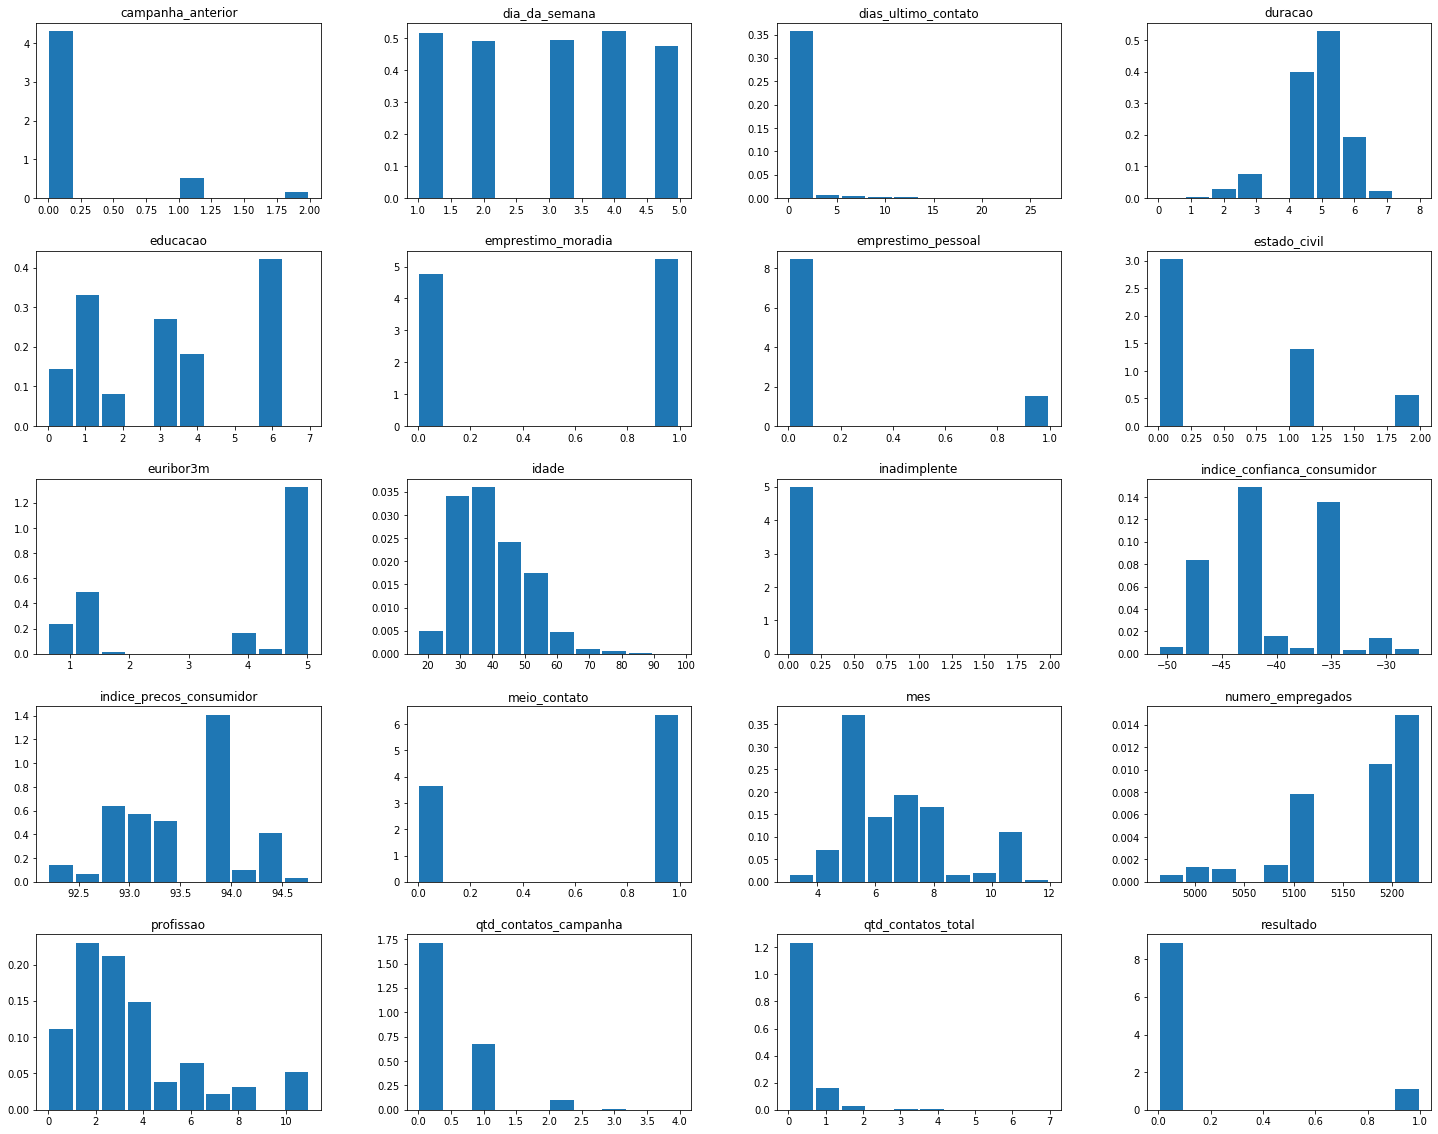

In [13]:
# Distribuition
df_callcenter[list_numerical_col].hist(figsize=[25,20],
                                       density=True, 
                                       bins=10, 
                                       grid=False, 
                                       zorder=2, 
                                       rwidth=0.9)

#### Notas
- Observando o dataframe gerado é possível notar que algumas features estão muito longe de uma distribuição normal. É o caso de: `inadimplente`, `dias_ultimo_contato` e `qtd_contatos_total`.
- A kurtose tambe apresenta valores muito discrepantes em :`inadimplente`, `dias_ultimo_contato` e `qtd_contatos_total`.
- A feature `inadimplente` é provinda de valores sim e não, por este motivo deu um valor tão discrepânte.
- Cabe **reanalisar** o processo de limpeza `dias_ultimo_contato` e `qtd_contatos_total`..

In [14]:
# reanalyze

list_col_reanalyze = ['dias_ultimo_contato','qtd_contatos_total']

- Simulando um **rescale**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95e5a98828>,
      dtype=object)

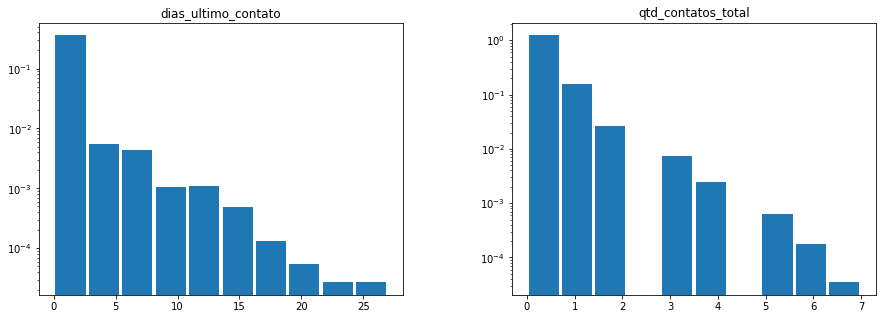

In [15]:
df_callcenter[list_col_reanalyze].hist(figsize=[15,5],
                                       density=True, 
                                       bins=10, 
                                       grid=False, 
                                       zorder=2, 
                                       rwidth=0.9,
                                       log=True)

#### Notas Sobre a Reanálise
- Ao simular uma aplicação de log afim de deixar as features mais próximas de uma distribuição gaussiana, houve uma grande diferença visual na distribuição.
- Para estas variáveis, será aplicado a técnica de **rescale**

#### `dias_ultimo_contato` e `qtd_contatos_total`
- Muitos dados da coluna `dias_ultimo_contato` e `qtd_contatos_total` são zeros, devido a isso é necessário adicionar uma correção para estes.
- Esta correção garante que os dados não vão tender ao infinito, até porque **log 0 = indefinido**
- O ideal é aplicar para o valor 0, **log 1 = 0** ou para dar mais peso log 2.

In [16]:
def apply_log(df: 'dataframe' = None,
              fix: int = 0,
              type_col: 'number' = 'int16',
              column: str = None):
    
    skew_before = df[column].skew()
    
    df[column] = [np.log(x + fix).astype(type_col) for x in df[column]]
    
    skew_after = df[column].skew()
    
    return f'Skew before = {skew_before} -> Skew after = {skew_after}'

In [17]:
apply_log(df = df_callcenter,
          fix = 2,
          type_col = 'int16',
          column = 'qtd_contatos_total')

'Skew before = 3.831179914382565 -> Skew after = 2.1250720833697336'

In [18]:
apply_log(df = df_callcenter,
          fix = 2,
          type_col = 'int16',
          column = 'dias_ultimo_contato')

'Skew before = 8.740110891712847 -> Skew after = 6.8460698723238895'

### Medidas de Dispersão

In [19]:
def show_measures_spread(df: 'dataframe', *columns: 'list') -> 'dataframe':
    index = ['std_deviation_pop',
            'std_deviation',
             'variance_pop',
             'variance',
             'maximum',
             'minimum'] 

    df_temp = pd.DataFrame(index=[index])
    
    print("-"*25, "MEASURES OF SPREAD", "-"*25, end='\n\n')
    
    for column in columns:
        list_temp = []
                
        list_temp.append(statistics.pstdev(df[column])) # population
        list_temp.append(statistics.stdev(df[column])) # sample
        list_temp.append(statistics.pvariance(df[column])) # population
        list_temp.append(statistics.variance(df[column])) # sample
        list_temp.append(df[column].max())
        list_temp.append(df[column].min())
        
        df_temp[column] = list_temp
    
    return df_temp

In [20]:
show_measures_spread(df_callcenter, *list_numerical_col)

------------------------- MEASURES OF SPREAD -------------------------



,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
std_deviation_pop,10.42,2.41,0.69,2.16,0.02,0.50,0.36,0.48,2.04,1.41,0.96,0.58,0.14,0.34,0.46,0.58,4.63,1.73,72.33,0.32
std_deviation,10.42,2.41,0.69,2.16,0.02,0.50,0.36,0.48,2.04,1.41,0.96,0.58,0.14,0.34,0.46,0.58,4.63,1.73,72.33,0.32
variance_pop,108.58,5.80,0.47,4.65,0.00,0.25,0.13,0.23,4.17,1.99,0.92,0.33,0.02,0.12,0.21,0.34,21.42,3.01,5231.42,0.10
variance,108.59,5.80,0.47,4.65,0.00,0.25,0.13,0.23,4.17,1.99,0.92,0.33,0.02,0.12,0.21,0.34,21.42,3.01,5231.55,0.10
maximum,98.00,11.00,2.00,7.00,2.00,1.00,1.00,1.00,12.00,5.00,8.00,4.00,3.00,2.00,2.00,94.77,-26.90,5.04,5228.00,1.00
minimum,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,92.20,-50.80,0.63,4963.00,0.00


### Medidas de Relação

In [21]:
df_callcenter.corr()

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
idade,1.00,0.02,-0.12,-0.11,0.00,-0.00,-0.01,-0.01,0.08,-0.02,0.01,-0.00,0.02,0.02,0.03,0.00,0.13,0.01,-0.02,0.03
profissao,0.02,1.00,-0.01,0.16,0.00,0.00,-0.01,0.02,0.06,0.00,0.01,-0.02,0.03,0.04,0.05,-0.05,0.02,-0.08,-0.09,0.06
estado_civil,-0.12,-0.01,1.00,0.06,-0.01,0.01,-0.00,0.04,-0.00,-0.00,0.00,0.01,0.01,0.03,0.03,-0.02,-0.05,-0.05,-0.05,0.03
educacao,-0.11,0.16,0.06,1.00,-0.00,0.02,0.01,0.10,0.12,0.01,-0.02,-0.00,0.01,0.01,0.02,-0.09,0.07,-0.02,-0.02,0.04
inadimplente,0.00,0.00,-0.01,-0.00,1.00,-0.00,-0.00,0.01,0.01,-0.01,-0.01,-0.01,-0.00,0.00,0.00,-0.00,0.00,0.01,0.01,-0.00
emprestimo_moradia,-0.00,0.00,0.01,0.02,-0.00,1.00,0.06,0.08,0.03,-0.01,-0.01,-0.01,0.00,0.02,0.02,-0.08,-0.03,-0.06,-0.05,0.01
emprestimo_pessoal,-0.01,-0.01,-0.00,0.01,-0.00,0.06,1.00,0.01,-0.00,0.00,-0.01,0.01,-0.00,-0.00,-0.00,-0.01,-0.01,-0.00,0.00,-0.00
meio_contato,-0.01,0.02,0.04,0.10,0.01,0.08,0.01,1.00,0.32,-0.02,0.05,-0.07,0.08,0.24,0.23,-0.59,-0.25,-0.40,-0.27,0.14
mes,0.08,0.06,-0.00,0.12,0.01,0.03,-0.00,0.32,1.00,-0.01,-0.03,-0.03,0.05,0.04,0.06,-0.15,0.26,0.16,0.13,0.04
dia_da_semana,-0.02,0.00,-0.00,0.01,-0.01,-0.01,0.00,-0.02,-0.01,1.00,-0.02,0.00,-0.01,0.01,0.00,-0.00,0.00,-0.01,-0.00,0.01


#### Análise Gráfica

In [22]:
def plot_correlation(df):
    plt.figure(figsize = (25,22), )
    plt.title('Correlation Features', y=1.05, size=18)

    correlation = df.corr(method='pearson')
    
    sns.heatmap(correlation, 
                annot=True, 
                cbar=True, 
                linecolor='white',
                linewidths=.1,
                cmap="RdYlGn")

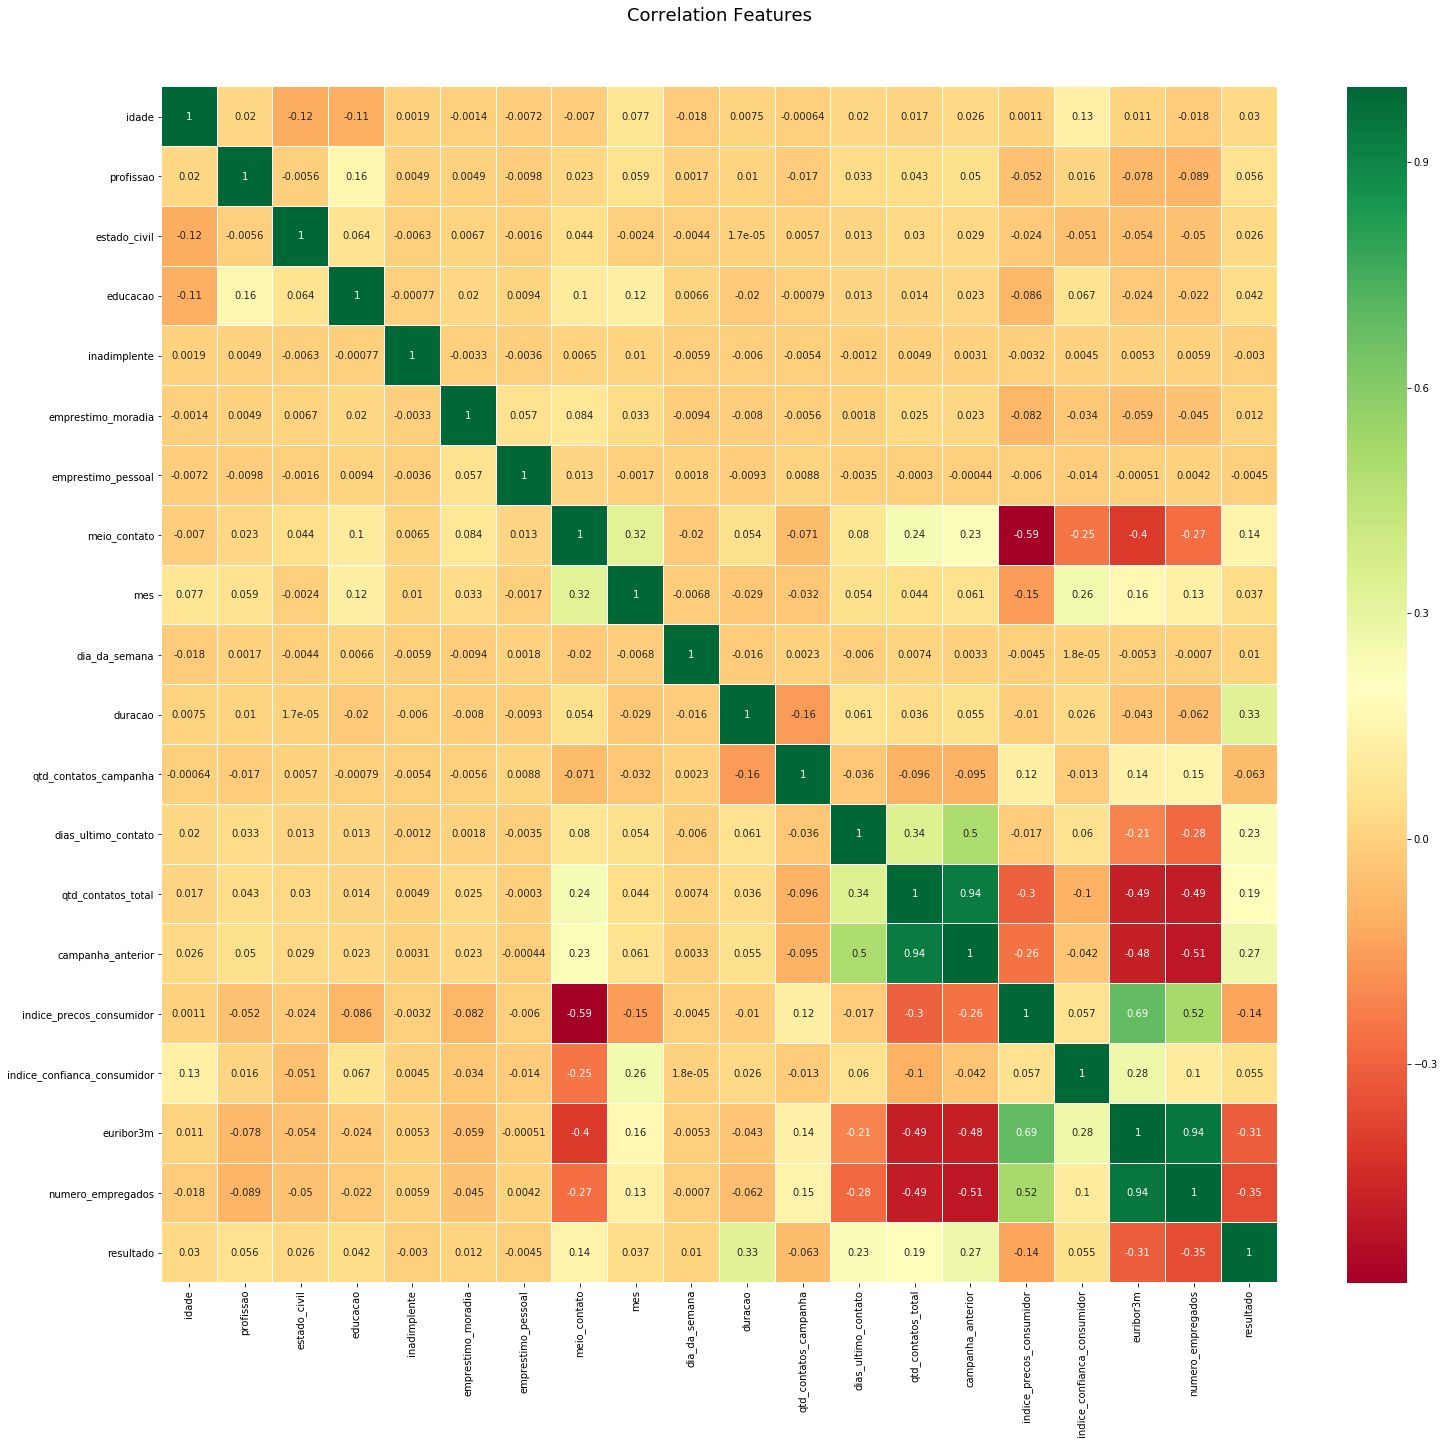

In [23]:
plot_correlation(df_callcenter)

#### Gráficos Scatter

- Vou imprimir junções de gráficos scatter com os grupos de features, conforme fornecido no arquivo `callcenter_descricao.txt`

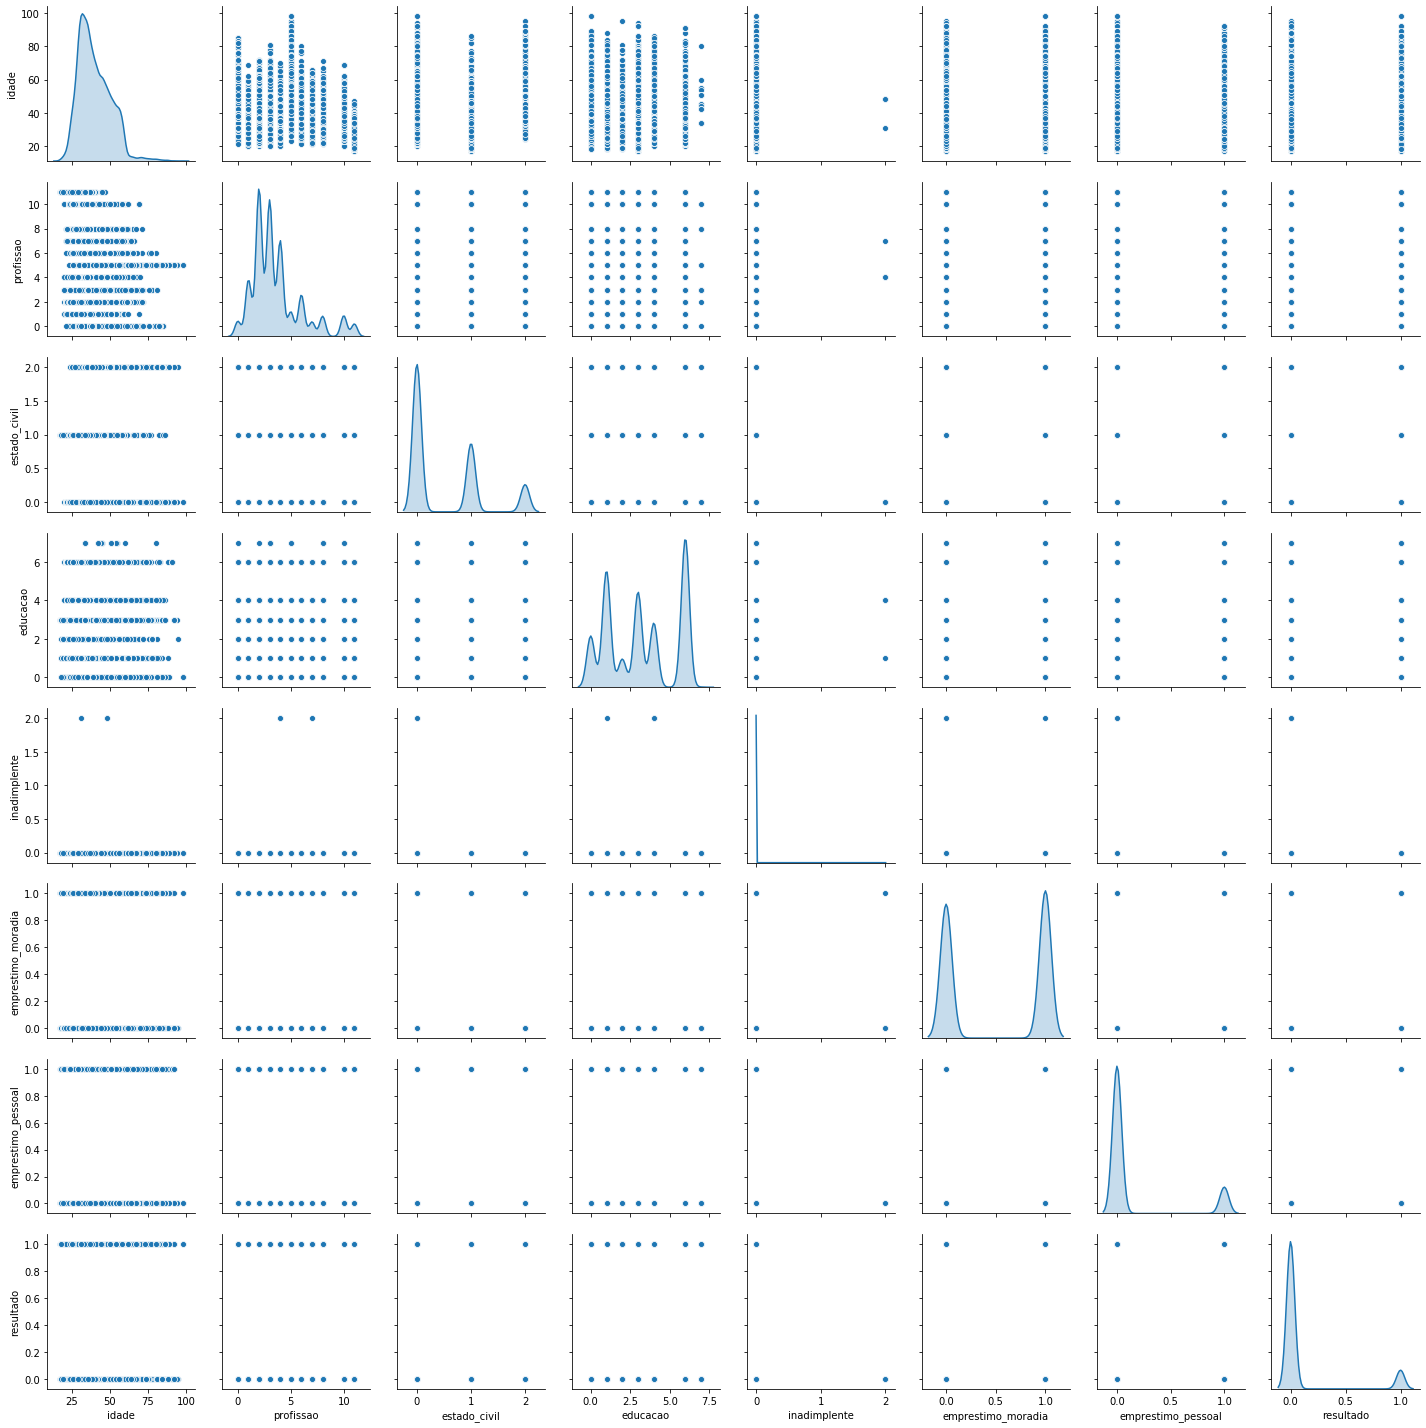

In [24]:
corr_client_data = sns.pairplot(df_callcenter[list_numerical_col], 
                                       vars=['idade',
                                             'profissao',
                                             'estado_civil',
                                             'educacao',
                                             'inadimplente',
                                             'emprestimo_moradia',
                                             'emprestimo_pessoal',
                                             'resultado'],
                                       kind = 'scatter',
                                       diag_kind='kde')
display(corr_client_data)

#### Notas
- Não há correlações visíveis entre as features e a variável target.

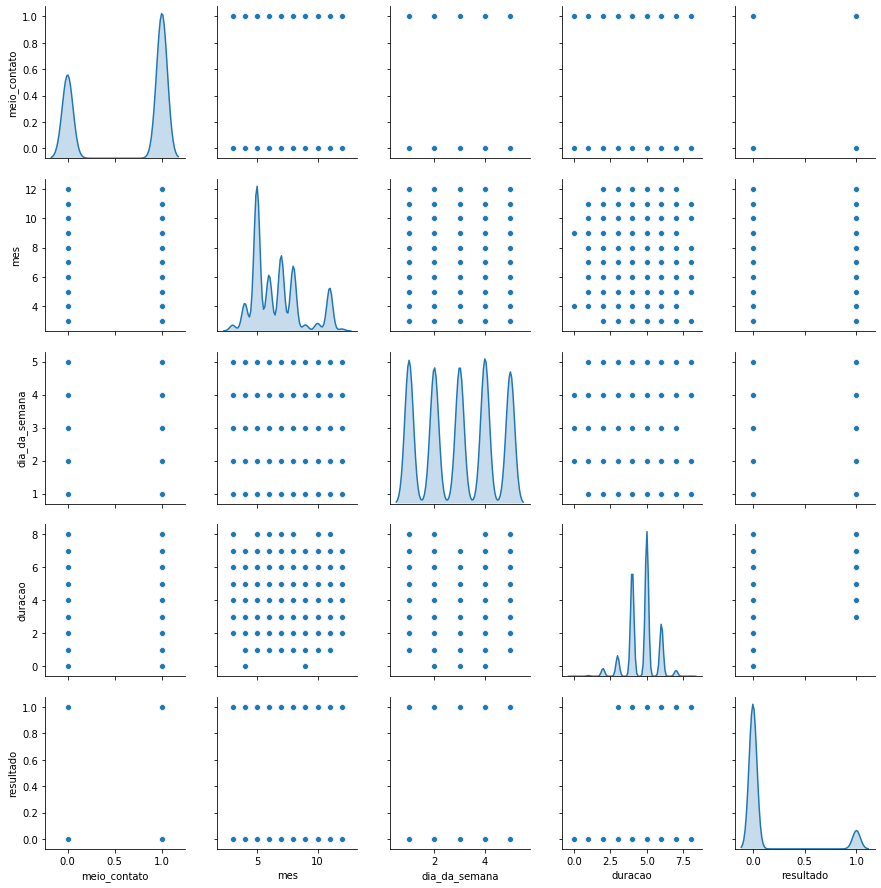

In [25]:
corr_last_contact = sns.pairplot(df_callcenter[list_numerical_col], 
                                       vars=['meio_contato',
                                             'mes',
                                             'dia_da_semana',
                                             'duracao',
                                             'resultado'],
                                       kind = 'scatter',
                                       diag_kind='kde')
display(corr_last_contact)

#### Notas
- Não há correlações visíveis entre as features e a variável target.

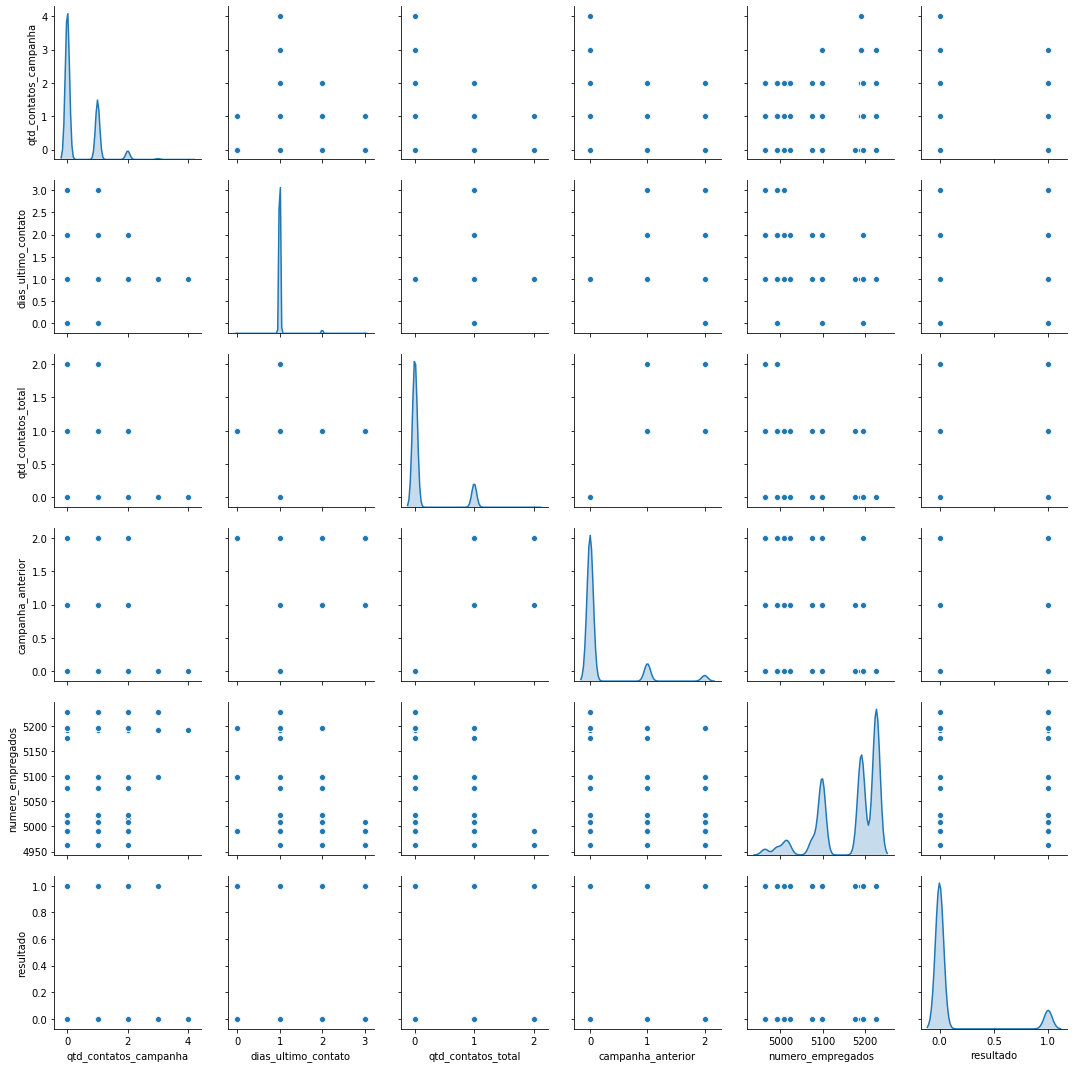

In [26]:
corr_other_var = sns.pairplot(df_callcenter[list_numerical_col], 
                                       vars=['qtd_contatos_campanha',
                                             'dias_ultimo_contato',
                                             'qtd_contatos_total',
                                             'campanha_anterior',
                                             'numero_empregados',
                                             'resultado'],
                                       kind = 'scatter',
                                       diag_kind='kde')
display(corr_other_var)

#### Notas
- Não há correlações visíveis entre as features e a variável target.

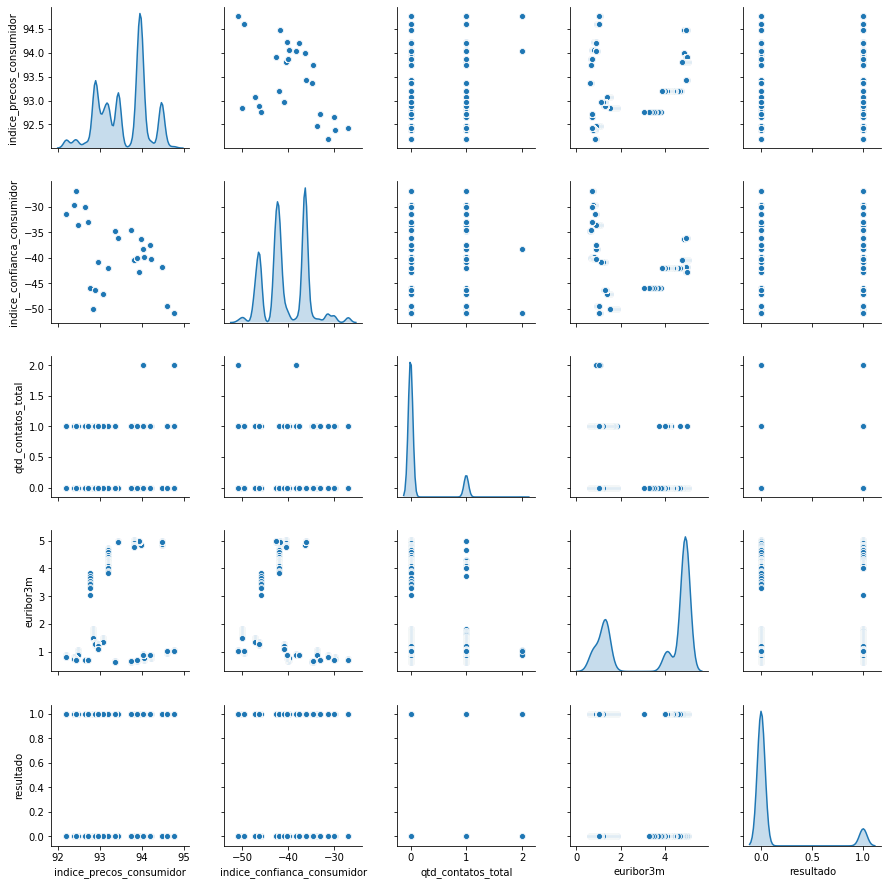

In [27]:
corr_indexes = sns.pairplot(df_callcenter[list_numerical_col], 
                                       vars=['indice_precos_consumidor',
                                             'indice_confianca_consumidor',
                                             'qtd_contatos_total',
                                             'euribor3m',
                                             'resultado'],
                                       kind = 'scatter',
                                       diag_kind='kde')
display(corr_indexes)

#### Notas
- Não há correlações visíveis entre as features e a variável target.

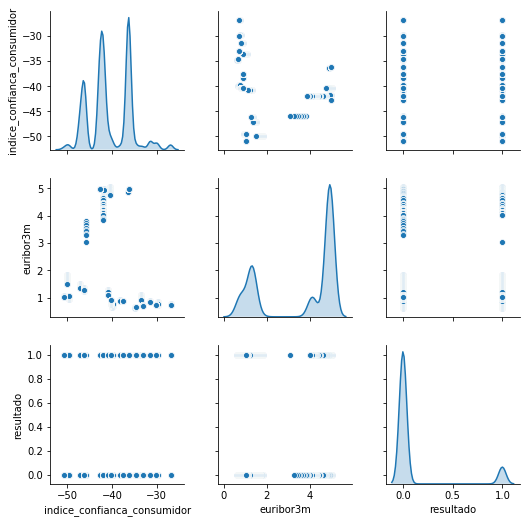

In [28]:
corr_until_inadimplente = sns.pairplot(df_callcenter[list_numerical_col], 
                                       vars=['indice_confianca_consumidor',
                                             'euribor3m',
                                             'resultado'],
                                       kind = 'scatter',
                                       diag_kind='kde')
display(corr_until_inadimplente)

#### Melhores Correlações

In [29]:
corrCatMatrix = df_callcenter[list_numerical_col].corr().abs()

s = corrCatMatrix.unstack()
sortedSeries = s.sort_values(kind="quicksort",ascending=False)
best_correlation = sortedSeries[sortedSeries != 1.0][0:20]


print("-"*25, "TOP CORRELATED IN PAIRS", "-"*25, end='\n\n')
print(best_correlation)

------------------------- TOP CORRELATED IN PAIRS -------------------------

numero_empregados         euribor3m                  0.94
euribor3m                 numero_empregados          0.94
qtd_contatos_total        campanha_anterior          0.94
campanha_anterior         qtd_contatos_total         0.94
indice_precos_consumidor  euribor3m                  0.69
euribor3m                 indice_precos_consumidor   0.69
indice_precos_consumidor  meio_contato               0.59
meio_contato              indice_precos_consumidor   0.59
indice_precos_consumidor  numero_empregados          0.52
numero_empregados         indice_precos_consumidor   0.52
campanha_anterior         numero_empregados          0.51
numero_empregados         campanha_anterior          0.51
campanha_anterior         dias_ultimo_contato        0.50
dias_ultimo_contato       campanha_anterior          0.50
numero_empregados         qtd_contatos_total         0.49
qtd_contatos_total        numero_empregados          

#### Notas
- Entre as 20 melhores correlações, não há algum caso de correlação das features com a variável target (`resultado`)

#### Sem Correlações

- correlation = 0% com a feature `resultado`
- São feature totalmente independentes

In [30]:
def get_without_correlation(df, list_col, target_col):
    corrCatMatrix = df[list_col].corr().abs()

    s = corrCatMatrix.unstack()
    sortedSeries = s\
                    .sort_values(kind="quicksort",ascending=True)\
                        .get(target_col)

    without_correlation = sortedSeries[sortedSeries < 0.01][0:-1]

    print("-"*25, "WITHOUT CORRELATED WITH TARGET", "-"*25, end='\n\n')
    print(without_correlation)
    return without_correlation.index.tolist()

In [31]:
def remove_without_corr(df: 'dataframe', list_without_corr: list) -> int:
    print(f'Columns before = {df.shape[1]}')

    for column in list_without_corr:
        del df[column]
    
    return print(f"Columns after = {df.shape[1]}")

In [32]:
list_without_corr = get_without_correlation(df = df_callcenter,
                                            list_col = list_numerical_col,
                                            target_col = 'resultado')

remove_without_corr(df_callcenter, list_without_corr)

------------------------- WITHOUT CORRELATED WITH TARGET -------------------------

inadimplente         0.00
emprestimo_pessoal   0.00
dtype: float64
Columns before = 20
Columns after = 18


---

## Feature Importance
Vou utilizar uma decision tree para fazer uma feature selection.<br/>
A partir disso, vou ranquear as features mais importantes.

**OBS:** não necessariamente utilizarei um modelo de random forest. Neste momento só estou usando para descobrir quais são as variáveis de maior peso no modelo.

In [38]:
def get_feature_importance_df(feature_importances,
                              column_names, 
                              top_n=25):
    """
    Get feature importance data frame.
 
    Parameters
    ----------
    feature_importances : numpy ndarray
        Feature importances computed by an ensemble 
            model like random forest or boosting
    column_names : array-like
        Names of the columns in the same order as feature 
            importances
    top_n : integer
        Number of top features
 
    Returns
    -------
    df : a Pandas data frame
    """
     
    imp_dict = dict(zip(column_names, feature_importances))
    
    # get name features sorted
    top_features = sorted(imp_dict, key=imp_dict.get, reverse=True)[0:top_n]
    
    # get values
    top_importances = [imp_dict[feature] for feature in top_features]
    
    # create dataframe with feature_importance
    df = pd.DataFrame(data={'feature': top_features, 'importance': top_importances})
    return df

In [39]:
# create model

rf = RandomForestClassifier(n_estimators=150, # numbers tree
                            max_depth=8,
                            min_samples_leaf=4,
                            max_features=0.2, # each tree utility 20% in the features
                            n_jobs=-1,
                            random_state=42)

In [40]:
# trainning model

rf.fit(df_callcenter[list_without_target_col], df_callcenter['resultado'])
features = df_callcenter[list_without_target_col].columns.values

print("---Traing Done---")

---Traing Done---


In [41]:
# get trained model (rf) and avalible the feature_importance
feature_importance = get_feature_importance_df(rf.feature_importances_, features)

# print feature_importance in the rf randomForest
display(feature_importance)

,feature,importance
0,duracao,0.33
1,numero_empregados,0.17
2,euribor3m,0.14
3,campanha_anterior,0.10
4,indice_confianca_consumidor,0.07
5,indice_precos_consumidor,0.05
6,idade,0.03
7,dias_ultimo_contato,0.03
8,mes,0.02
9,meio_contato,0.01


[Text(0, 0.5, 'Importance'),
 Text(0.5, 0, "Name's Variable"),
 Text(0.5, 1.0, 'Variable Importances')]

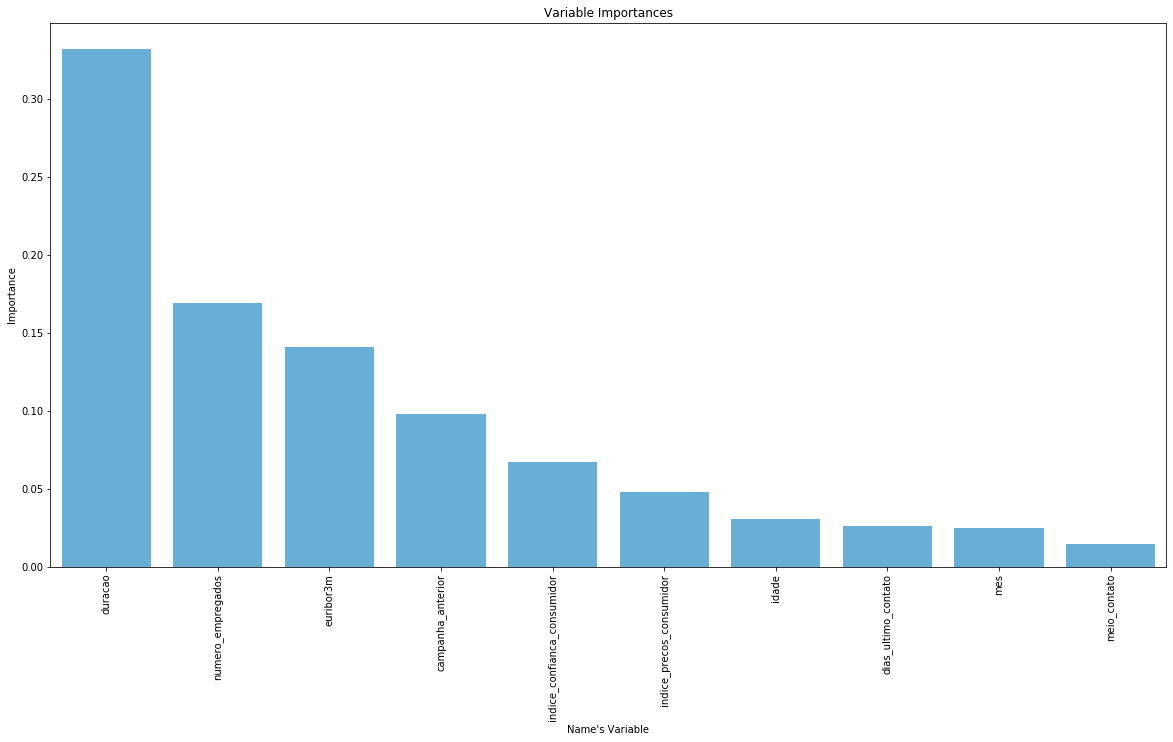

In [45]:
fig,ax = plt.subplots()
plt.xticks(rotation='vertical')

fig.set_size_inches(20,10)
sns.barplot(data=feature_importance[:10], 
            x="feature", 
            y="importance", 
            ax=ax,
            color=default_color)
ax.set(xlabel="Name's Variable",
       ylabel='Importance',
       title="Variable Importances")

#### Eliminação de Feature Sem Importância

Ao eliminar features que não tem importância para o modelo fará com que o restante das features fiqeum mais ortogonais e diminuirá o ruído.

In [46]:
def get_without_importance(df_feature_importance: 'dataframe') -> list:
    list_drop_col = []
              
    cond_duracao = (df_feature_importance['importance'] < 0.01)
    df_temp = df_feature_importance[cond_duracao]
    
    list_drop_col = df_temp['feature'].tolist()
    
    return list_drop_col

In [47]:
def remove_without_importace(df: 'dataframe', list_without_imp: list) -> int:
    print(f'Columns before = {df.shape[1]}')
    
    for column in list_without_imp:
        del df[column]
        
    return print(f"Columns after = {df.shape[1]}")

In [48]:
list_without_importance = get_without_importance(df_feature_importance = feature_importance)

remove_without_importace(df = df_callcenter,
                        list_without_imp = list_without_importance)

Columns before = 18
Columns after = 12


In [49]:
df_callcenter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41172 entries, 0 to 41171
Data columns (total 12 columns):
idade                          41172 non-null int64
profissao                      41172 non-null int64
meio_contato                   41172 non-null int64
mes                            41172 non-null int64
duracao                        41172 non-null int64
dias_ultimo_contato            41172 non-null int64
campanha_anterior              41172 non-null int64
indice_precos_consumidor       41172 non-null float64
indice_confianca_consumidor    41172 non-null float64
euribor3m                      41172 non-null float64
numero_empregados              41172 non-null int64
resultado                      41172 non-null int64
dtypes: float64(3), int64(9)
memory usage: 3.8 MB


---

### Armazenamento dos Dados Limpos

In [50]:
def save_data_clenning(df: 'dataframe' = None,
                       path: str = 'reports/') -> None:
    df.to_csv(path_or_buf = path,
              sep = ',',
              index = False,
              encoding = 'utf8')
    
    return "Data storage!"

In [51]:
save_data_clenning(df = df_callcenter,
                   path = 'reports/callcenter_marketing_clenning.csv')

'Data storage!'